# Time Series - Introductory Examples

Text(0,0.5,'Anzahl Passagiere (in 1000)')

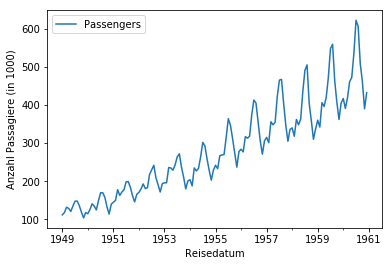

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline  
AirP = pd.read_csv("/Users/mirkobirbaumer/Dropbox (CC-IIMSN)/Statistics/Themen/Time_Series_Introduction/Skript_de/Daten/AirPassengers.csv")
AirP.head()
AirP["TravelDate"] = pd.DatetimeIndex(AirP["TravelDate"])
AirP.set_index("TravelDate", inplace=True)
AirP.head()
AirP.plot()
plt.xlabel("Reisedatum")
plt.ylabel("Anzahl Passagiere (in 1000)")

In [3]:
AusBeer = pd.read_csv("/Users/mirkobirbaumer/Dropbox (CC-IIMSN)/Statistics/Themen/Time_Series_Introduction/Skript_de/Daten/AustralianBeer.csv",sep=";",header=0)
AusBeer1 = AusBeer.copy()
AusBeer1.head()

,Quarter,megalitres
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [4]:

AusBeer1["Quarter"] = pd.DatetimeIndex(AusBeer["Quarter"])
AusBeer1.set_index("Quarter", inplace=True)
AusBeer1.head()

,megalitres
Quarter,
1956-01-01,284.4
1956-04-01,212.8
1956-07-01,226.9
1956-10-01,308.4
1957-01-01,262.0


In [7]:
AusBeer1.describe()

,megalitres
count,154.000000
mean,408.267532
std,97.598588
min,212.800000
25%,325.425000
50%,427.450000
75%,466.950000
max,600.000000


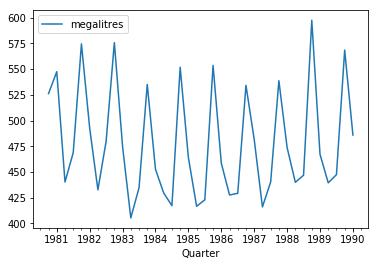

In [6]:
AusBeer1.loc["1980-9":"1990-3",:].plot()

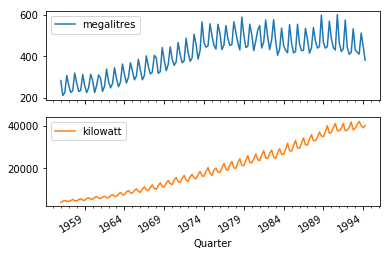

In [8]:
AusEl = pd.read_csv("/Users/mirkobirbaumer/Dropbox (CC-IIMSN)/Statistics/Themen/Time_Series_Introduction/Skript_de/Daten/AustralianElectricity.csv",sep=";")
Aussie = AusBeer.copy()
# Hier wird der Datensatz um eine Spalte erweitert
Aussie["kilowatt"] = AusEl["kilowatt"]
Aussie["Quarter"]=pd.DatetimeIndex(Aussie["Quarter"])
Aussie.set_index("Quarter", inplace=True)
Aussie.plot(subplots=True)
plt.show()

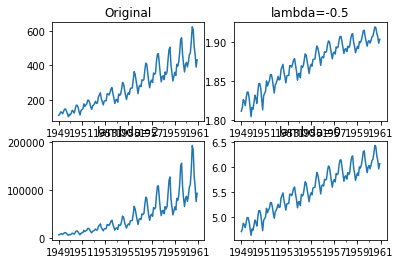

In [9]:
def boxcox(x,lambd):
    return np.log(x) if (lambd==0) else (x**lambd-1)/lambd
AirP["l_2"] = boxcox(AirP["Passengers"],2)
AirP["l_0"] = boxcox(AirP["Passengers"],0)
AirP["l_-05"] = boxcox(AirP["Passengers"],-.5)
plt.subplot(221)
AirP["Passengers"].plot()
plt.title("Original")
plt.xlabel("")
plt.subplot(222)
AirP["l_-05"].plot()
plt.title("lambda=-0.5")
plt.xlabel("")
plt.subplot(223)
AirP["l_2"].plot()
plt.title("lambda=2")
plt.xlabel("")
plt.subplot(224)
AirP["l_0"].plot()
plt.title("lambda=0")
plt.xlabel("")
plt.show()

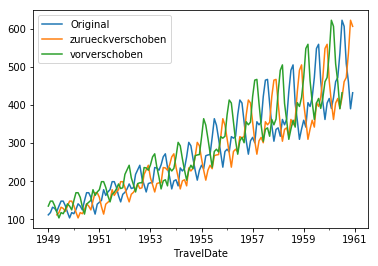

In [10]:
AirP["s_4"] = AirP["Passengers"].shift(4)
AirP["s_-5"] = AirP["Passengers"].shift(-5)
AirP["Passengers"].plot()
AirP["s_4"].plot()
AirP["s_-5"].plot()
plt.legend(["Original","zurueckverschoben","vorverschoben"])
plt.show()

In [11]:
AirQ = pd.read_csv("/Users/mirkobirbaumer/Dropbox (CC-IIMSN)/Statistics/Themen/Time_Series_Introduction/Skript_de/Daten/AirQualityUCI.csv",sep=";",decimal=",")
AirQ1 = AirQ.copy()
# pandas kennt das Zeitformat in der Tabelle nicht:
#Punkt muss durch - ersetzt werden
AirQ1["Time"] = AirQ1["Time"].str.replace(".","-")
AirQ1["Date"] = pd.DatetimeIndex(AirQ1["Date"]+" "+AirQ1["Time"])
AirQ1.set_index("Date", inplace=True)
AirQ1.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN


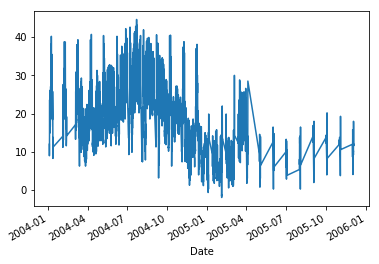

In [12]:
# Einige Wert der Temperatur sind -200. Diese Zeilen werden weggelassen
AirQ1 = AirQ1[AirQ1["T"] > -20]
AirQ1["T"].plot()
plt.show()

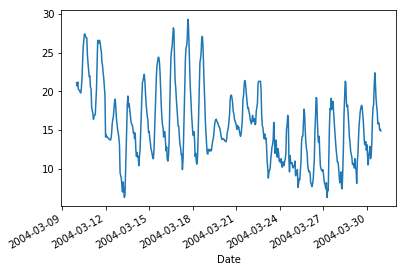

In [13]:
AirQ4 = AirQ1.loc["2004-3-10":"2004-3-30","T"]
AirQ4.plot()

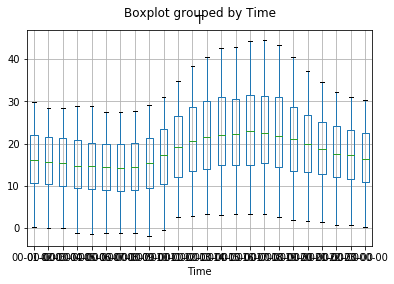

In [16]:
AirQ1.boxplot("T",by="Time")
plt.show()

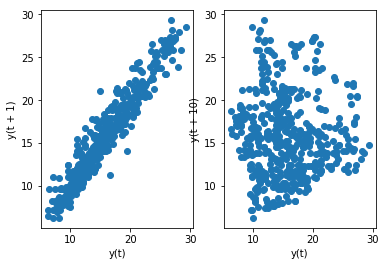

In [17]:
from pandas.plotting import lag_plot
plt.subplot(121)
lag_plot(AirQ4)
plt.subplot(122)
lag_plot(AirQ4, 10)
plt.show()

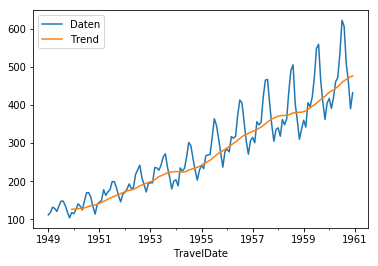

In [18]:
AirP["Trend"] = AirP["Passengers"].rolling(window=12).mean()
AirP["Passengers"].plot()
AirP["Trend"].plot()
plt.legend(["Daten","Trend"])
plt.show()

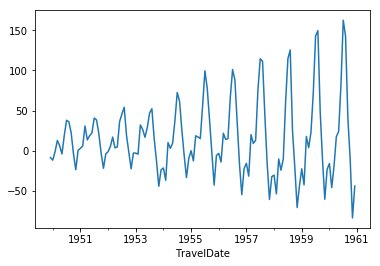

In [19]:
AirP["Season"] = AirP["Passengers"]-AirP["Trend"]
AirP["Season"].plot()
plt.show()

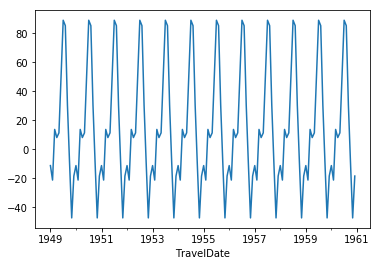

In [20]:
AirP2 = AirP["Season"].values.reshape((12,12))
# Entlang der Spalten (axis=0) wird der Mittelwert genommen
# nanmean bedeutet, die NaN werden ignoriert
ave = np.nanmean(AirP2,axis=0)
# Der Vektor ave wird verzwölfacht,
# damit er wieder die gleiche Länge hat, wie AirP[’Season’]
AirP["Season_ave"] = np.tile(A=ave, reps=12)
AirP["Season_ave"].plot()
plt.show()

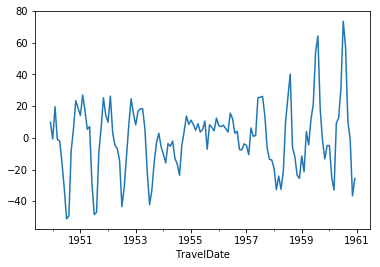

In [21]:
AirP["Residual"] = AirP["Season"]- AirP["Season_ave"]
AirP["Residual"].plot()
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


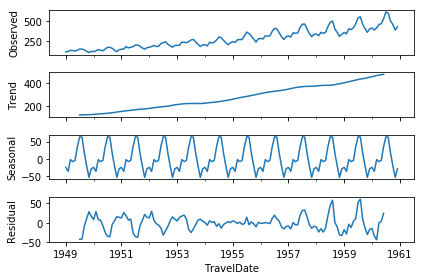

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(AirP["Passengers"], model="additive", freq=12).plot()
plt.show()

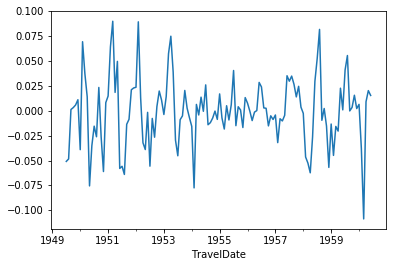

In [23]:
seasonal_decompose(np.log(AirP["Passengers"]), model="add").resid.plot()
plt.show()

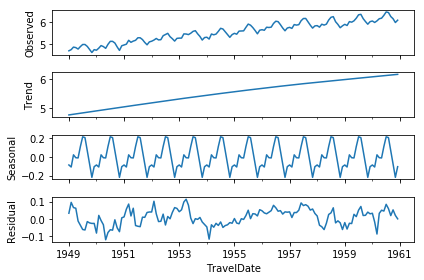

In [57]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)
AirQ1.head()


decompose(np.log(AirP["Passengers"]), period = 12).plot();

